## Objectives
After completing this lab you will be able to:

Understand the concept of overfitting versus underfitting
Apply polynomial transforms to data
Perform hyperparameters grid search on a model, using validation data

In [21]:
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn
import scipy
import matplotlib.pyplot as plt
from tqdm import tqdm

In [22]:
# Surpress warnings:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

In [23]:
from tqdm import tqdm

import numpy as np
import pandas as pd
from itertools import accumulate
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_digits, load_wine

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pylab as plt
%matplotlib inline

# You can also use this section to suppress warnings generated by your code:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn
warnings.filterwarnings('ignore')

sns.set_context('notebook')
sns.set_style('white')

In [24]:
def get_R2_features(model,test=True):
    #X: global
    features=list(X)
    features.remove("three")

    R_2_train=[]
    R_2_test=[]

    for feature in features:
        model.fit(X_train[[feature]],y_train)

        R_2_test.append(model.score(X_test[[feature]],y_test))
        R_2_train.append(model.score(X_train[[feature]],y_train))

    plt.bar(features,R_2_train,label="Train")
    plt.bar(features,R_2_test,label="Test")
    plt.xticks(rotation=90)
    plt.ylabel("$R^2$")
    plt.legend()
    plt.show()
    print("Training R^2 mean value {} Testing R^2 mean value {} ".format(str(np.mean(R_2_train)),str(np.mean(R_2_test))) )
    print("Training R^2 max value {} Testing R^2 max value {} ".format(str(np.max(R_2_train)),str(np.max(R_2_test))) )

In [25]:
def  plot_dis(y,yhat):

    plt.figure()
    ax1 = sns.distplot(y, hist=False, color="r", label="Actual Value")
    sns.distplot(yhat, hist=False, color="b", label="Fitted Values" , ax=ax1)
    plt.legend()

    plt.title('Actual vs Fitted Values')
    plt.xlabel('Price (in dollars)')
    plt.ylabel('Proportion of Cars')

    plt.show()
    plt.close()

In [26]:
data = pd.read_csv('/content/encoded_car_data (1).csv')

In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 36 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   diesel       205 non-null    float64
 1   gas          205 non-null    float64
 2   std          205 non-null    float64
 3   turbo        205 non-null    float64
 4   convertible  205 non-null    float64
 5   hardtop      205 non-null    float64
 6   hatchback    205 non-null    float64
 7   sedan        205 non-null    float64
 8   wagon        205 non-null    float64
 9   4wd          205 non-null    float64
 10  fwd          205 non-null    float64
 11  rwd          205 non-null    float64
 12  dohc         205 non-null    float64
 13  dohcv        205 non-null    float64
 14  l            205 non-null    float64
 15  ohc          205 non-null    float64
 16  ohcf         205 non-null    float64
 17  ohcv         205 non-null    float64
 18  rotor        205 non-null    float64
 19  eight   

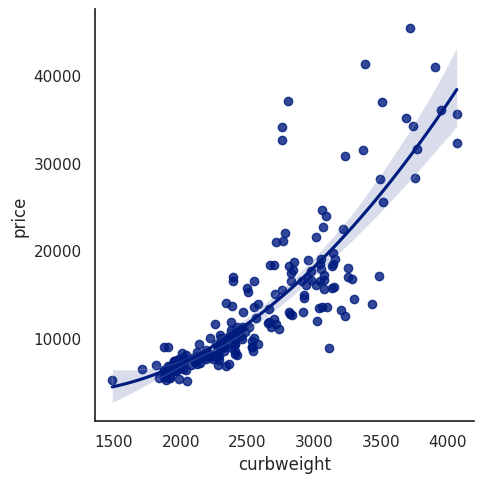

In [28]:
sns.lmplot(x = 'curbweight', y = 'price', data = data, order=2)

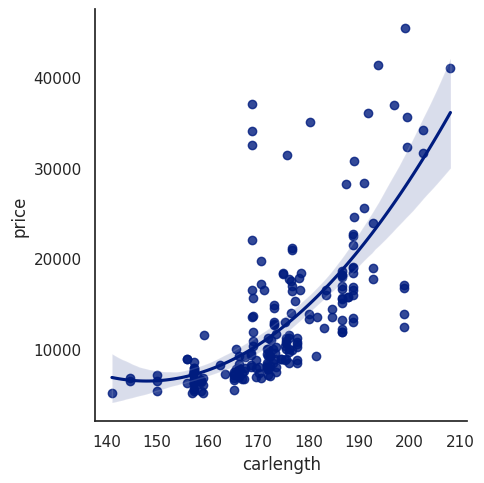

In [29]:
sns.lmplot(x = 'carlength', y = 'price', data = data, order=2)

## Exercise 1
In this Exercise, visualize the relationship between the 'horsepower' and the target variable, 'price'.

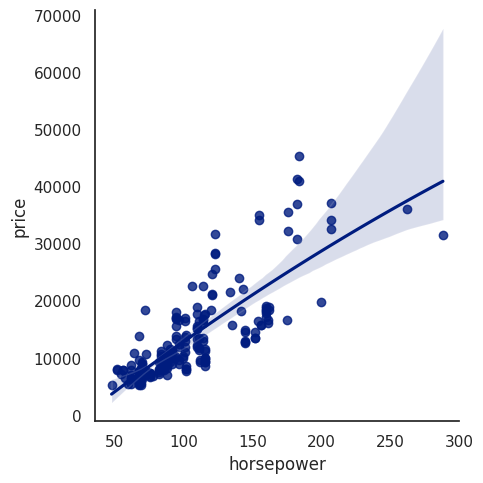

In [30]:
sns.lmplot(x = 'horsepower', y = 'price', data = data, order=2)

## Data Preparation

In [31]:
X = data.drop('price', axis=1)
y = data.price

## Train Test Split

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)
print("Number of test samples:", X_test.shape[0])
print("Number of training samples:", X_train.shape[0])


Number of test samples: 62
Number of training samples: 143


## Multiple Features

In [33]:
lm = LinearRegression()

In [34]:
lm.fit(X_train, y_train)

LinearRegression()

In [35]:
predicted = lm.predict(X_test)

In [36]:
print("R^2 on training  data ",lm.score(X_train, y_train))
print("R^2 on testing data ",lm.score(X_test,y_test))

R^2 on training  data  0.9262722224294516
R^2 on testing data  0.8471124710243334


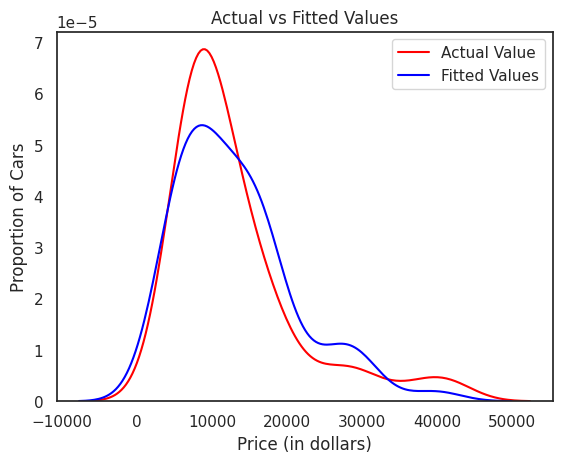

In [37]:
plot_dis(y_test,predicted)

In [38]:
{col:coef for col,coef in zip(X.columns, lm.coef_)}

{'diesel': np.float64(771.2244282090302),
 'gas': np.float64(-771.224428205094),
 'std': np.float64(304.3744402511874),
 'turbo': np.float64(-304.3744402510732),
 'convertible': np.float64(1786.647521855913),
 'hardtop': np.float64(3165.452040209071),
 'hatchback': np.float64(-1770.7658370331858),
 'sedan': np.float64(-687.6843494280745),
 'wagon': np.float64(-2493.6493756037094),
 '4wd': np.float64(-605.6774561363832),
 'fwd': np.float64(-270.9879508471072),
 'rwd': np.float64(876.665406983499),
 'dohc': np.float64(2467.0217490605596),
 'dohcv': np.float64(-13286.459963163768),
 'l': np.float64(2148.236615121714),
 'ohc': np.float64(4642.4285008526),
 'ohcf': np.float64(6068.751775202578),
 'ohcv': np.float64(-2819.9527705637856),
 'rotor': np.float64(779.9740934900934),
 'eight': np.float64(9218.442191802074),
 'five': np.float64(-2742.728535000297),
 'four': np.float64(-5338.369710810963),
 'six': np.float64(-2146.2003214469246),
 'three': np.float64(-9.094947017729282e-13),
 'twelv

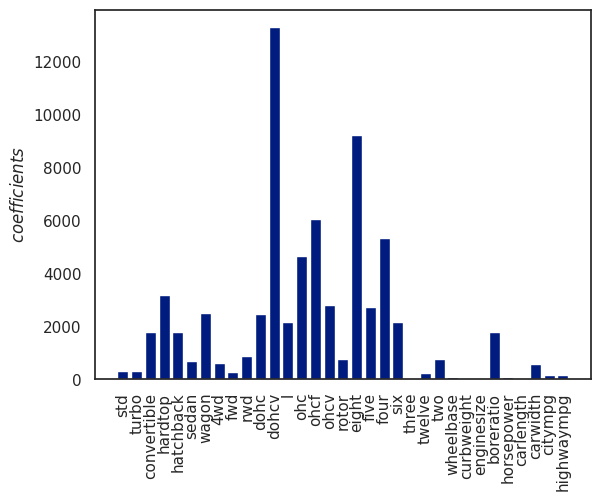

In [39]:
plt.bar(X.columns[2:],abs(lm.coef_[2:]))
plt.xticks(rotation=90)
plt.ylabel("$coefficients$")
plt.show()

## Individual Features

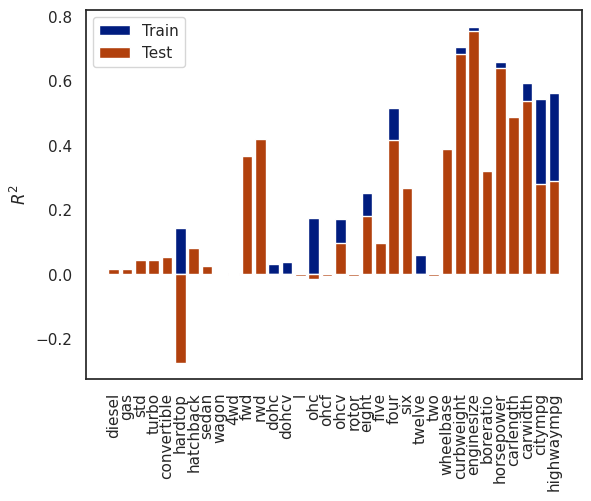

Training R^2 mean value 0.21817773426877915 Testing R^2 mean value 0.18241493035139267 
Training R^2 max value 0.7686929078033781 Testing R^2 max value 0.7534902447506853 


In [40]:
get_R2_features(lm)

## Exercise 2
In this Exercise, calculate the
 using the object Pipeline for Linear Regression and apply StandardScaler() to all features, then use the function plot_dis to compare the predicted values versus the actual values.

R^2 on training  data  0.9262722224294516
R^2 on testing data  0.8419174509630336


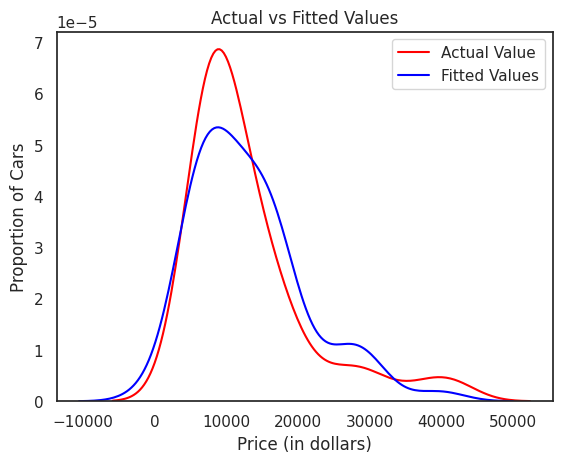

In [41]:
pipe = Pipeline([('ss',StandardScaler() ),('lr', LinearRegression())])
pipe.fit(X_train,y_train)
print("R^2 on training  data ", pipe.score(X_train, y_train))
print("R^2 on testing data ", pipe.score(X_test,y_test))
predicted = pipe.predict(X_test)
plot_dis(y_test,predicted)

## Exercise 3
In this Exercise, calculate the
 using the object Pipeline with StandardScaler() for each individual features using the function get_R2_features.

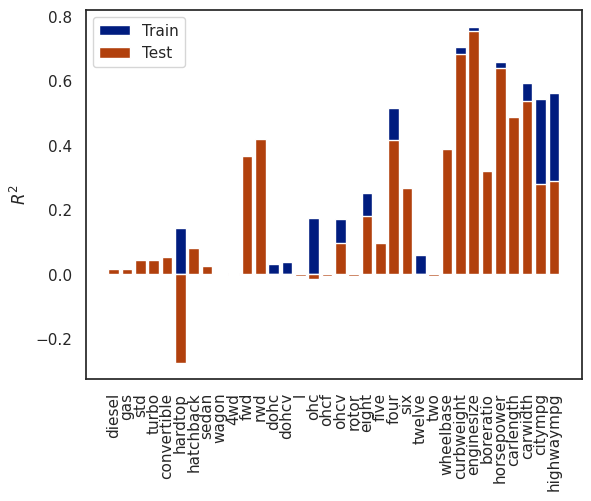

Training R^2 mean value 0.21817773426877915 Testing R^2 mean value 0.18241493035139264 
Training R^2 max value 0.7686929078033782 Testing R^2 max value 0.7534902447506853 


In [42]:
pipe = Pipeline([('ss',StandardScaler() ),('lr', LinearRegression())])
get_R2_features(pipe)

## Polynomial Features
## Multiple Features
Polynomial transform is a simple way to increase the complexity of the model, but we must be mindful of overfilling. Below, we will perform a second degree (degree=2) polynomial transformation.



In [43]:
poly_features = PolynomialFeatures(degree=2, include_bias=False)

In [44]:
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)

In [45]:
print(X_train_poly.shape)


(143, 665)


In [46]:
print(X_test_poly.shape)

(62, 665)


In [47]:
lm = LinearRegression()
lm.fit(X_train_poly, y_train)

LinearRegression()

In [48]:
print("R^2 on training data:", lm.score(X_train_poly, y_train))
print("R^2 on testing data:", lm.score(X_test_poly,y_test))

R^2 on training data: 0.9985318497975837
R^2 on testing data: -36729.957915833795


## Individual Features
Data Pipelines simplify the steps of processing the data. We use the module Pipeline to create a pipeline. We also use PolynomialFeatures as a step in our pipeline.

In [49]:
Input=[ ('polynomial', PolynomialFeatures(include_bias=False,degree=2)), ('model', LinearRegression())]

In [50]:
pipe=Pipeline(Input)
pipe.fit(X_train, y_train)

Pipeline(steps=[('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

In [51]:
print("R^2 on training  data:", pipe.score(X_train, y_train))
print("R^2 on testing data:", pipe.score(X_test,y_test))

R^2 on training  data: 0.9985318497975837
R^2 on testing data: -36729.957915833795


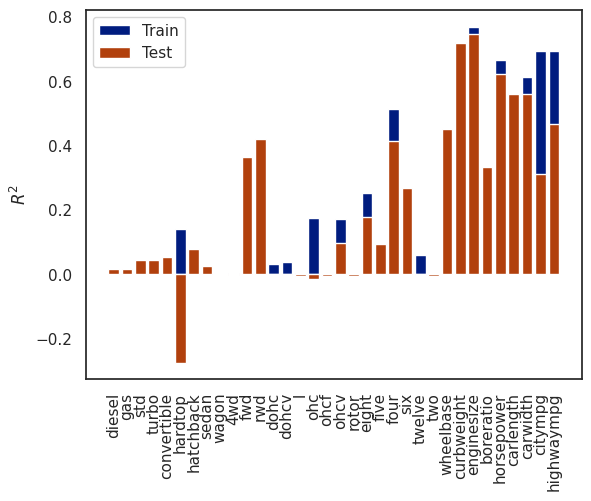

Training R^2 mean value 0.23084141934087032 Testing R^2 mean value 0.19386255223850493 
Training R^2 max value 0.7706959974452947 Testing R^2 max value 0.7463370080614307 


In [52]:
get_R2_features(pipe)

## GridSearch and Pipeline

In [53]:
Input=[ ('polynomial', PolynomialFeatures(include_bias=False,degree=2)), ('scaler', StandardScaler()),('model',LinearRegression() )]
pipe=Pipeline(Input)

In [54]:
param_grid = {
    "polynomial__degree": [1, 2, 3],


}

In [55]:
search = GridSearchCV(pipe, param_grid, n_jobs=1)

In [56]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('polynomial', PolynomialFeatures(include_bias=False)),
                ('scaler', StandardScaler()), ('model', LinearRegression())])

In [57]:
search.fit(X_test, y_test)

GridSearchCV(estimator=Pipeline(steps=[('polynomial',
                                        PolynomialFeatures(include_bias=False)),
                                       ('scaler', StandardScaler()),
                                       ('model', LinearRegression())]),
             n_jobs=1, param_grid={'polynomial__degree': [1, 2, 3]})

In [58]:
best=search.best_estimator_
best

Pipeline(steps=[('polynomial',
                 PolynomialFeatures(degree=1, include_bias=False)),
                ('scaler', StandardScaler()), ('model', LinearRegression())])

In [59]:
best.score(X_test,y_test)

0.9681812255199611

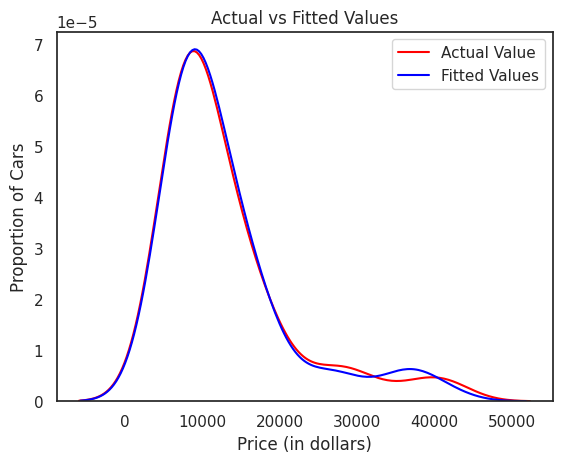

In [60]:
predicted=best.predict(X_test)
plot_dis(y_test,predicted)

## Exercise 4
In this Exercise, calculate the R^2
 using the object Pipeline with GridSearch for each individual features.

diesel
gas
std
turbo
convertible
hardtop
hatchback
sedan
wagon
4wd
fwd
rwd
dohc
dohcv
l
ohc
ohcf
ohcv
rotor
eight
five
four
six
three
twelve
two
wheelbase
curbweight
enginesize
boreratio
horsepower
carlength
carwidth
citympg
highwaympg


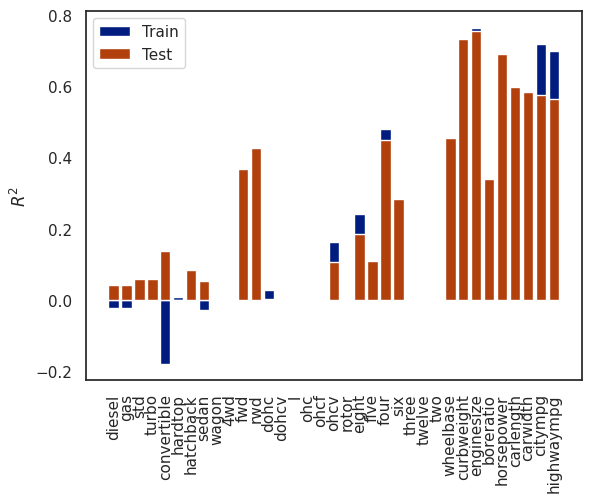

Training R^2 mean value 0.18703320030116613 Testing R^2 mean value 0.22042180897460442 
Training R^2 max value 0.765323637379124 Testing R^2 max value 0.7565151400968062 


In [61]:
features=list(X)


R_2_train=[]
R_2_test=[]

for feature in features:
    param_grid = {
    "polynomial__degree": [ 1, 2,3,4,5],
    "model__positive":[True, False]}
    Input=[ ('polynomial', PolynomialFeatures(include_bias=False,degree=2)), ('model',LinearRegression())]
    pipe=Pipeline(Input)
    print(feature)
    search = GridSearchCV(pipe, param_grid, n_jobs=2)
    search.fit(X_test[[feature]], y_test)
    best=search.best_estimator_

    R_2_test.append(best.score(X_test[[feature]],y_test))
    R_2_train.append(best.score(X_train[[feature]],y_train))


plt.bar(features,R_2_train,label="Train")
plt.bar(features,R_2_test,label="Test")
plt.xticks(rotation=90)
plt.ylabel("$R^2$")
plt.legend()
plt.show()
print("Training R^2 mean value {} Testing R^2 mean value {} ".format(str(np.mean(R_2_train)),str(np.mean(R_2_test))) )
print("Training R^2 max value {} Testing R^2 max value {} ".format(str(np.max(R_2_train)),str(np.max(R_2_test))) )